### 데이터 증식 사용하기
* 기존 데이터를 변형하여 새로운 데이터를 만들어내는 방법
* 일반화를 보완하지만 근본적인 해결책은 아님
* 데이터가 다양해지므로 테스트 성능이 높아짐.
* 케라스가 이미지 제너레이터(ImageGenerator)를 제공.

In [17]:
from keras.utils import load_img, img_to_array # 케라스가 업데이트되면서 경로가 바뀌었다.
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [18]:
train_datagen = ImageDataGenerator(horizontal_flip=True, # 이미지 수평 방향 뒤집기
                                   vertical_flip=True, # 이미지 수직 방향 뒤집기
                                   shear_range=0.5, # 밀림 강도를 50%조절
                                   brightness_range=[0.5,1.5], # 밝기를 0.5~1.5로 조절
                                   zoom_range=0.2, # 확대 비율 20%
                                   width_shift_range=0.1, # 너비 방향 이동 10%
                                   height_shift_range=0.1, # 높이 방향 이동 10%
                                   rotation_range=30, # 이미지 회전 30도
                                   fill_mode='nearest') # 이미지 변환시 픽셀 변환을 근처를 가져옴

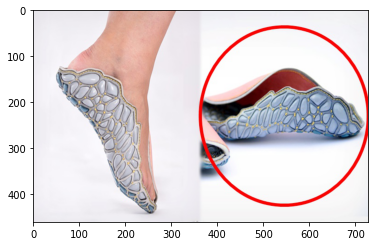

In [19]:
img = img_to_array(load_img('img04.jpg')).astype(np.uint8)
plt.imshow(img)

In [20]:
result = img.reshape((1,)+img.shape)
img.shape,result.shape

((460, 728, 3), (1, 460, 728, 3))

In [21]:
train_generator = train_datagen.flow(result,batch_size=1)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_

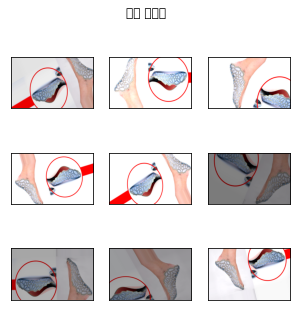

In [22]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('증강 이미지')

for i in range(9):
  data = next(train_generator)
  image = data[0]
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.array(image,dtype=np.uint8))
plt.show()

In [23]:
from keras.datasets import cifar10
import numpy as np
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_mean = np.mean(x_train,axis=(0,1,2))
x_std = np.std(x_train, axis = (0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=777)

In [24]:
train_datagen = ImageDataGenerator(horizontal_flip=True, 
                                   zoom_range=0.2, 
                                   width_shift_range=0.1, 
                                   height_shift_range=0.1, 
                                   rotation_range=30, 
                                   fill_mode='nearest') 

val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(x_train,y_train,batch_size=batch_size)
val_generator = val_datagen.flow(x_val,y_val,batch_size=batch_size)

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from keras.optimizers import Adam

model = Sequential([
    Conv2D(filters=32,kernel_size=3,padding='same',input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=32,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(filters=64,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=64,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(filters=128,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=128,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dense(10, activation = 'softmax')
])
model.compile(optimizer = Adam(1e-4), loss = 'sparse_categorical_crossentropy',metrics=['acc'])

def get_step(train_len, batch_size):
  if(train_len % batch_size > 0):
    return train_len // batch_size + 1
  else:
    return train_len // batch_size

history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=get_step(len(x_train),batch_size),
                    validation_data=val_generator,
                    validation_steps = get_step(len(x_val), batch_size))

Epoch 1/100
1094/1094 [==============================] - 24s 21ms/step - loss: 1.6084 - acc: 0.1101 - val_loss: 1.3281 - val_acc: 0.0959
Epoch 2/100
1094/1094 [==============================] - 23s 21ms/step - loss: 1.3403 - acc: 0.1031 - val_loss: 1.3337 - val_acc: 0.1547
Epoch 3/100
1094/1094 [==============================] - 23s 21ms/step - loss: 1.2327 - acc: 0.1030 - val_loss: 1.1966 - val_acc: 0.1062
Epoch 4/100
1094/1094 [==============================] - 23s 21ms/step - loss: 1.1464 - acc: 0.1057 - val_loss: 1.1078 - val_acc: 0.0997
Epoch 5/100
1094/1094 [==============================] - 23s 21ms/step - loss: 1.0812 - acc: 0.1055 - val_loss: 1.0105 - val_acc: 0.1137
Epoch 6/100
1094/1094 [==============================] - 24s 22ms/step - loss: 1.0271 - acc: 0.1056 - val_loss: 0.9308 - val_acc: 0.1032
Epoch 7/100
1094/1094 [==============================] - 23s 21ms/step - loss: 0.9786 - acc: 0.1053 - val_loss: 1.0202 - val_acc: 0.0892
Epoch 8/100
1094/1094 [==================

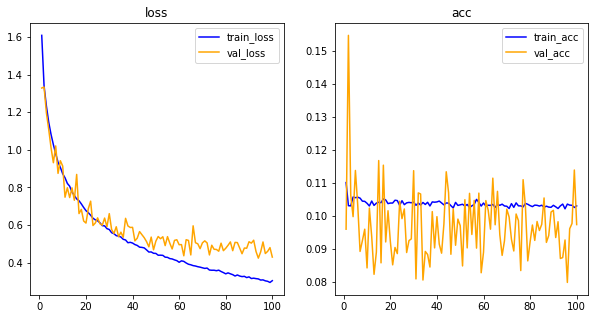

In [26]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.set_title('acc')
ax2.legend()

plt.show()

In [1]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(x_test,batch_size=batch_size)
pred = model.predict(x_test)
np.argmax(np.round(pred[0],2))

NameError: ignored